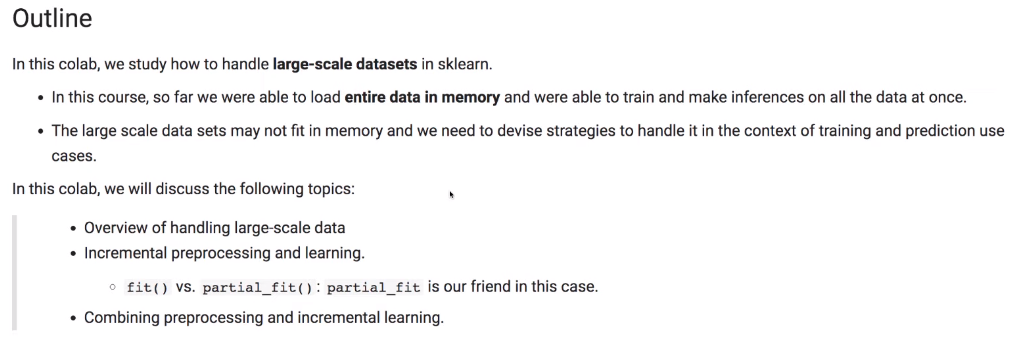
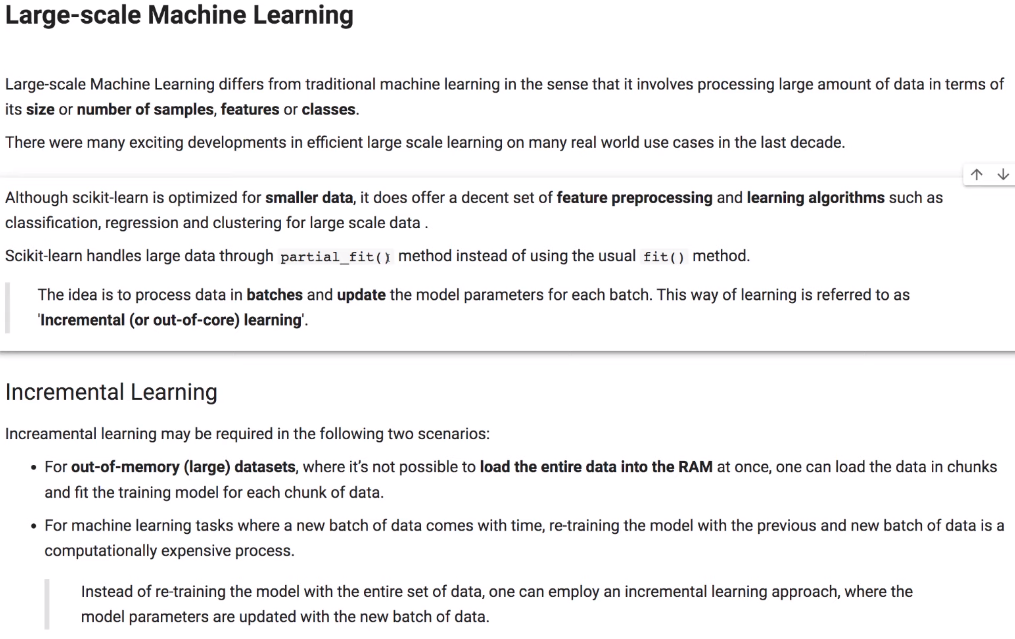
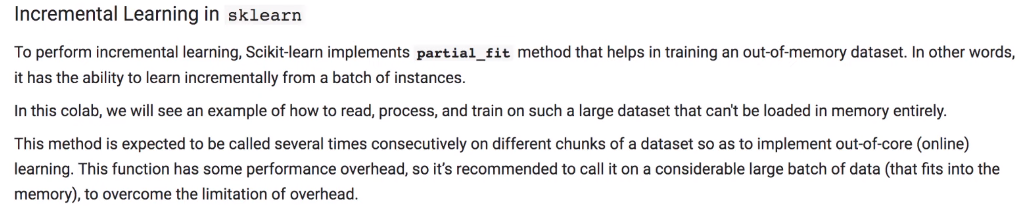
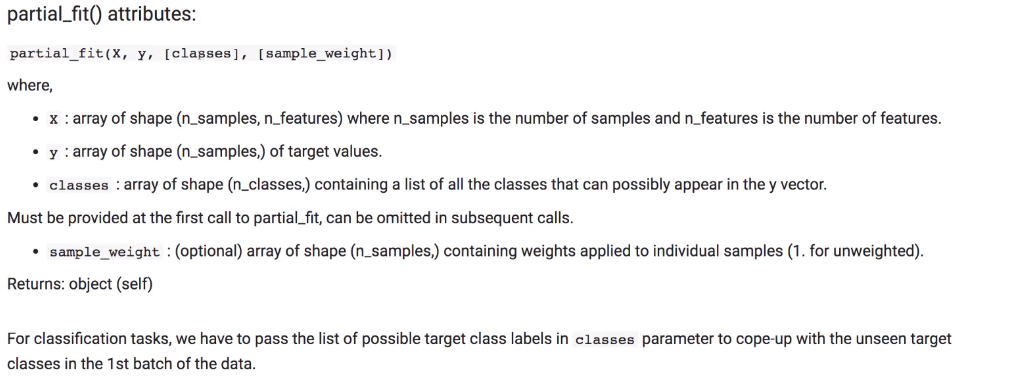
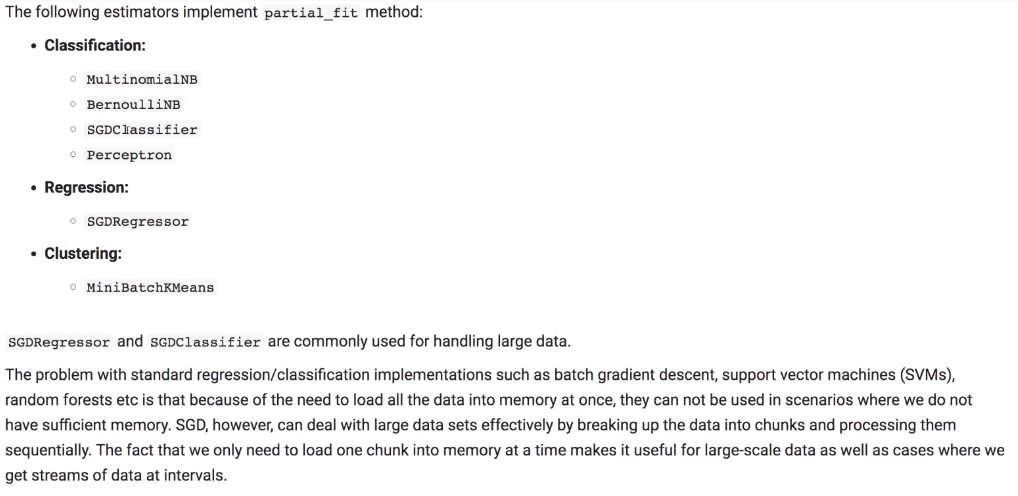
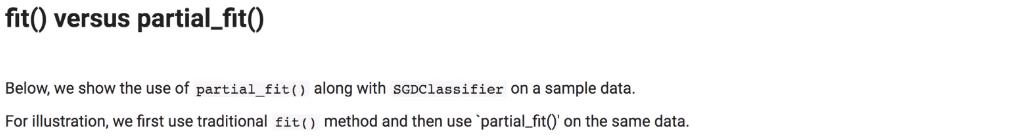

In [1]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

 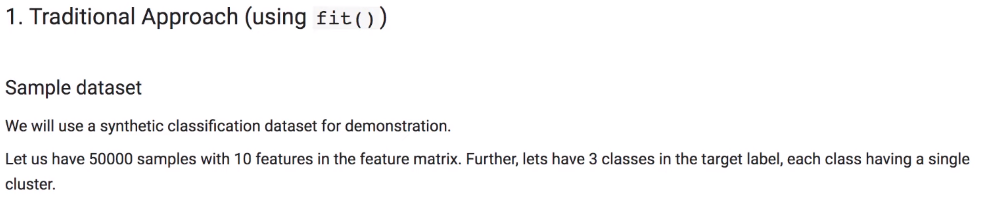

In [2]:
X, y = make_classification(
    n_samples=50000,
    n_features=10,
    n_classes=3,
    n_clusters_per_class=1
)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.15)

In [3]:
clf1 = SGDClassifier(max_iter=1000, tol=0.01)

In [4]:
clf1.fit(Xtrain, ytrain)

SGDClassifier(tol=0.01)

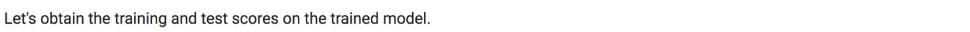

In [5]:
train_score = clf1.score(Xtrain, ytrain)
print('Trainning score:', train_score)

Trainning score: 0.9305411764705882


In [6]:
test_score = clf1.score(Xtest, ytest)
print('Test score:', test_score)

Test score: 0.9290666666666667


In [8]:
ypred = clf1.predict(Xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

[[2460    4   11]
 [ 395 2135    4]
 [  13  105 2373]]


In [10]:
cr = classification_report(ytest, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2475
           1       0.95      0.84      0.89      2534
           2       0.99      0.95      0.97      2491

    accuracy                           0.93      7500
   macro avg       0.93      0.93      0.93      7500
weighted avg       0.93      0.93      0.93      7500



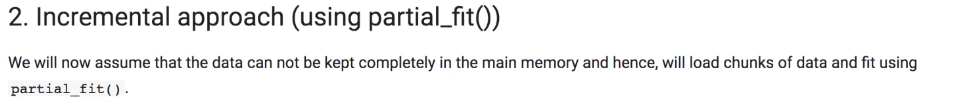

In [11]:
Xtrain[0:5]

array([[-1.43089057e-01, -7.00426490e-01, -1.54828301e+00,
        -5.13265437e-02, -1.59015509e-01, -1.45763034e+00,
         1.14849312e+00, -2.80332234e-03,  2.54313926e+00,
        -8.49233832e-01],
       [ 4.53453778e-01, -4.27169046e-01, -1.43327445e+00,
        -2.15991856e+00,  1.31270869e+00,  4.89587519e-01,
        -1.10016776e+00, -1.53112573e+00, -7.74764230e-02,
         3.50567444e-01],
       [ 4.84155125e-01,  1.43001285e+00,  4.75658692e-02,
        -6.51122975e-01,  4.40325155e-01,  1.26528807e+00,
        -9.42401275e-01, -5.37401978e-01, -1.08422824e+00,
        -4.44347271e-01],
       [-4.00121939e-01, -6.03505098e-01,  1.29063933e-01,
         1.04556586e+00,  1.46063719e+00,  7.78380003e-01,
         1.89700283e-01,  7.80601565e-01,  5.64983007e-01,
        -2.98058247e+00],
       [-5.60783201e-01, -1.39852310e+00, -4.70643535e-01,
         9.80411746e-01, -1.30320495e-01,  1.99888019e+00,
        -1.68336419e+00,  7.72464862e-01, -7.12157240e-01,
         7.

In [12]:
ytrain[0:5]

array([1, 2, 2, 0, 0])

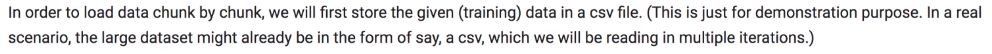

In [13]:
import numpy as np

In [14]:
train_data = np.concatenate((Xtrain, ytrain[:, np.newaxis]), axis=1)
train_data[0:5]

array([[-1.43089057e-01, -7.00426490e-01, -1.54828301e+00,
        -5.13265437e-02, -1.59015509e-01, -1.45763034e+00,
         1.14849312e+00, -2.80332234e-03,  2.54313926e+00,
        -8.49233832e-01,  1.00000000e+00],
       [ 4.53453778e-01, -4.27169046e-01, -1.43327445e+00,
        -2.15991856e+00,  1.31270869e+00,  4.89587519e-01,
        -1.10016776e+00, -1.53112573e+00, -7.74764230e-02,
         3.50567444e-01,  2.00000000e+00],
       [ 4.84155125e-01,  1.43001285e+00,  4.75658692e-02,
        -6.51122975e-01,  4.40325155e-01,  1.26528807e+00,
        -9.42401275e-01, -5.37401978e-01, -1.08422824e+00,
        -4.44347271e-01,  2.00000000e+00],
       [-4.00121939e-01, -6.03505098e-01,  1.29063933e-01,
         1.04556586e+00,  1.46063719e+00,  7.78380003e-01,
         1.89700283e-01,  7.80601565e-01,  5.64983007e-01,
        -2.98058247e+00,  0.00000000e+00],
       [-5.60783201e-01, -1.39852310e+00, -4.70643535e-01,
         9.80411746e-01, -1.30320495e-01,  1.99888019e+00,
  

In [15]:
a = np.asarray(train_data)
np.savetxt('train_data.csv', a, delimiter=',')

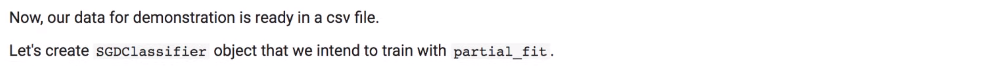

In [16]:
# Create another classifier and fit incrementally
clf2 = SGDClassifier(max_iter=1000, tol=0.01)

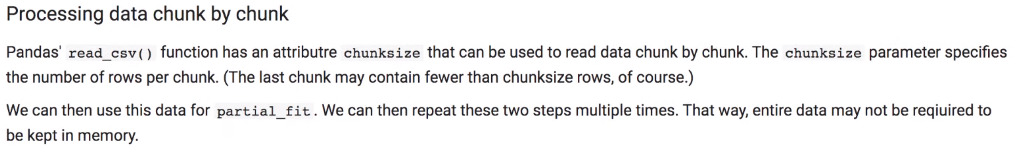

In [21]:
import pandas as pd

chunksize = 1000

iter = 1
for train_df in pd.read_csv('train_data.csv', chunksize=chunksize, iterator=True):
    Xtrain_partial = train_df.iloc[:, 0:10]
    ytrain_partial = train_df.iloc[:, 10]
    
    if iter == 1:
        # In the first iterator all class labels have to be specified       
        clf2.partial_fit(Xtrain_partial, ytrain_partial, classes=np.array([0, 1, 2]))
    else:
        clf2.partial_fit(Xtrain_partial, ytrain_partial)
        
    print('after iter #', iter)
    print('clf2.coef_:', clf2.coef_)
    print('clf2.intercept_:', clf2.intercept_)    
    iter+= 1

after iter # 1
clf2.coef_: [[ -9.93493012 -13.01927263   3.85179817  27.68594679  -6.17649089
   -6.14865754  -1.44832108  20.52579599  -6.33039416 -10.84876319]
 [ -3.37064601 -29.34743833   0.62533113 -12.48302964  -3.88710059
  -19.63714974  -0.80933769  -7.54137013 -13.70577166   2.28150659]
 [ 20.61435742  70.50213649  -8.35135096 -19.28642157  -9.57087155
    6.54110846  16.53928795 -17.28718982   5.53306779   2.66835332]]
clf2.intercept_: [-26.00818758 -35.62915505 -52.4860744 ]
after iter # 2
clf2.coef_: [[-9.23427987e+00 -1.22588652e+01  6.02849754e+00  2.55949903e+01
  -1.35419286e+00 -5.59331291e+00 -2.64196050e+00  1.89864454e+01
   5.16583679e-02 -3.79907856e-01]
 [-9.83807647e-01 -8.26554623e+00 -6.41144466e+00 -3.38002813e+00
   7.94234059e+00 -3.20481344e+00  1.19486084e+01 -2.02644969e+00
   4.54502447e-01  6.34160539e+00]
 [ 1.64750343e+01  5.27494208e+01 -1.25832007e+01 -1.85692141e+01
  -3.53630148e+00  1.88404867e+01 -5.19067935e+00 -1.59082255e+01
  -1.62216289e-0

after iter # 28
clf2.coef_: [[-1.35480713 -1.72789086 -0.23682829  3.81717887 -0.92442593 -0.47787042
  -0.05839716  2.82671265 -0.36770729  0.34639407]
 [ 0.242845   -0.44040105  0.37728945 -1.3424393  -0.32700601  0.84819666
  -0.91813156 -0.94312107 -0.37432314  0.19368663]
 [ 3.103157    8.94704106 -0.27123965 -4.36507589  0.8845692   0.89099386
   0.16309831 -3.57158129 -1.23541717 -0.29107787]]
clf2.intercept_: [-4.59784577 -3.70167999 -6.78356482]
after iter # 29
clf2.coef_: [[-1.51237827 -1.81746664  0.0989066   4.35887744 -0.59599676  1.06432488
  -0.87836566  3.22028222  1.39940188 -0.0627234 ]
 [-0.28664745 -2.0571885  -0.03924813 -0.6767323   0.14480772 -0.73755546
  -1.38650682 -0.38615407 -1.44167889  0.51057645]
 [ 3.04218287  9.32849434  0.11547853 -3.79032209  0.10945932  0.88437558
  -0.27522781 -3.17717647 -0.56910623  0.31226078]]
clf2.intercept_: [-4.93548716 -3.00716599 -6.10776812]
after iter # 30
clf2.coef_: [[-1.34194148 -1.42461134  0.3640339   4.03265576 -0.3

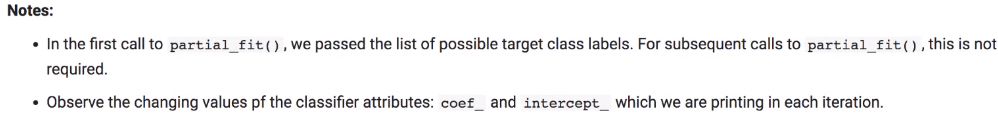

In [22]:
test_score = clf2.score(Xtest, ytest)
print('Test score:', test_score)

Test score: 0.9309333333333333


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [23]:
ypred = clf2.predict(Xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

[[2456    4   15]
 [ 350 2180    4]
 [  13  132 2346]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [24]:
cr = classification_report(ytest, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      2475
           1       0.94      0.86      0.90      2534
           2       0.99      0.94      0.97      2491

    accuracy                           0.93      7500
   macro avg       0.93      0.93      0.93      7500
weighted avg       0.93      0.93      0.93      7500




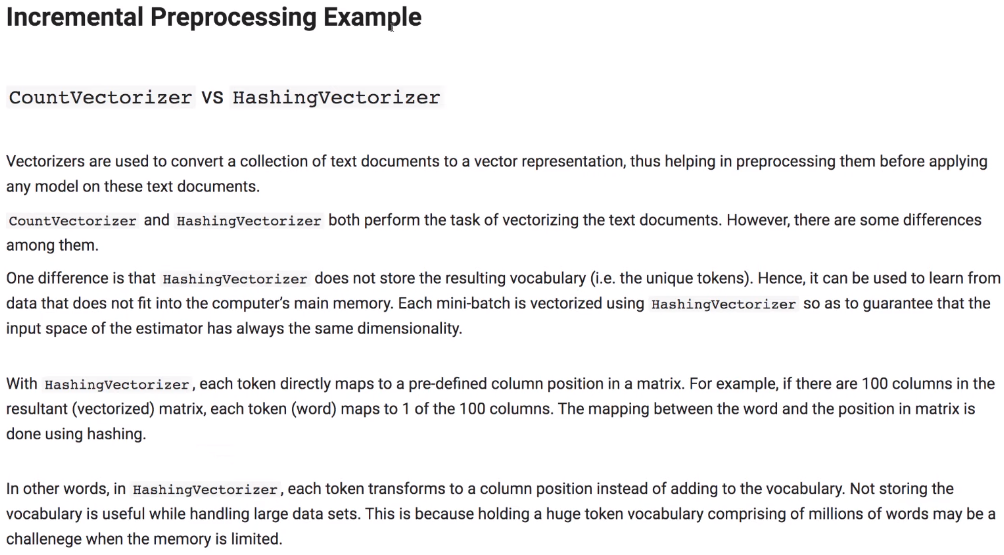
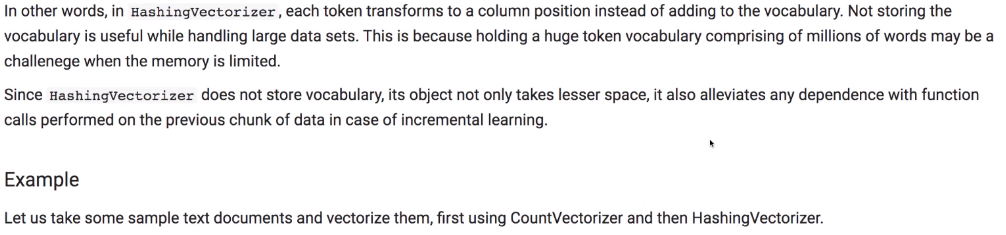

In [30]:
text_documents = [
    'The study tells us that the “an apple a day keeps the doctor away” aphorism was coined in 1913 but was \
    based on the original form with a different rhyme, some 149 years ago in Wales: “Eat an apple on going \
    to bed and you’ll keep the doctor from earning his bread,” went the proverb in Pembrokeshire.',
    'The University  of Michigan School of Nursing researchers in Ann Arbor believe giving such medical proverbs\
    an empirical evaluation “may allow us to profit from the wisdom of our predecessors.”', 
    'For the study’s measure of keeping the doctor away, Matthew Davis, PhD, and co-authors evaluated an \
    outcome of no more than one visit a year to the doctor as a means of investigating the proverb’s success \
    daily apple eaters compared with non-apple eaters.', 
    'So did a daily apple succeed in keeping the doctor away? No, it did not. There was no statistically \
    meaningful difference in visits to the doctor for daily apple eaters in the analysis. But the study did find \
    that an apple a day kept the pharmacist away.'
]

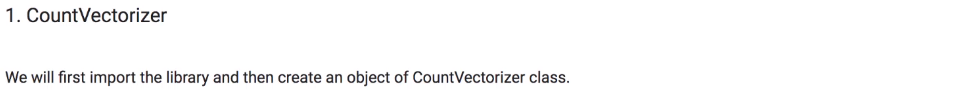

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
c_vectorizer = CountVectorizer()

In [32]:
X_c = c_vectorizer.fit_transform(text_documents)

In [33]:
X_c.shape

(4, 103)

Here, 103 is the size of the vocabulary. <br>
We can also see the vocabulary using `vocabulary_` attribute

In [34]:
c_vectorizer.vocabulary_

{'the': 88,
 'study': 81,
 'tells': 85,
 'us': 92,
 'that': 87,
 'an': 4,
 'apple': 9,
 'day': 24,
 'keeps': 47,
 'doctor': 28,
 'away': 13,
 'aphorism': 8,
 'was': 96,
 'coined': 20,
 'in': 42,
 '1913': 1,
 'but': 18,
 'based': 14,
 'on': 63,
 'original': 65,
 'form': 37,
 'with': 99,
 'different': 27,
 'rhyme': 76,
 'some': 79,
 '149': 0,
 'years': 101,
 'ago': 2,
 'wales': 95,
 'eat': 30,
 'going': 40,
 'to': 90,
 'bed': 15,
 'and': 6,
 'you': 102,
 'll': 49,
 'keep': 45,
 'from': 38,
 'earning': 29,
 'his': 41,
 'bread': 17,
 'went': 97,
 'proverb': 73,
 'pembrokeshire': 68,
 'university': 91,
 'of': 62,
 'michigan': 56,
 'school': 77,
 'nursing': 61,
 'researchers': 75,
 'ann': 7,
 'arbor': 10,
 'believe': 16,
 'giving': 39,
 'such': 84,
 'medical': 55,
 'proverbs': 74,
 'empirical': 32,
 'evaluation': 34,
 'may': 51,
 'allow': 3,
 'profit': 72,
 'wisdom': 98,
 'our': 66,
 'predecessors': 71,
 'for': 36,
 'measure': 54,
 'keeping': 46,
 'matthew': 50,
 'davis': 23,
 'phd': 70,
 'c

In [35]:
print(X_c)

  (0, 88)	6
  (0, 81)	1
  (0, 85)	1
  (0, 92)	1
  (0, 87)	1
  (0, 4)	2
  (0, 9)	2
  (0, 24)	1
  (0, 47)	1
  (0, 28)	2
  (0, 13)	1
  (0, 8)	1
  (0, 96)	2
  (0, 20)	1
  (0, 42)	3
  (0, 1)	1
  (0, 18)	1
  (0, 14)	1
  (0, 63)	2
  (0, 65)	1
  (0, 37)	1
  (0, 99)	1
  (0, 27)	1
  (0, 76)	1
  (0, 79)	1
  :	:
  (3, 28)	2
  (3, 13)	2
  (3, 96)	1
  (3, 42)	3
  (3, 18)	1
  (3, 90)	1
  (3, 36)	1
  (3, 46)	1
  (3, 58)	2
  (3, 22)	2
  (3, 31)	1
  (3, 78)	1
  (3, 25)	3
  (3, 82)	1
  (3, 44)	1
  (3, 60)	1
  (3, 89)	1
  (3, 80)	1
  (3, 52)	1
  (3, 26)	1
  (3, 94)	1
  (3, 5)	1
  (3, 35)	1
  (3, 48)	1
  (3, 69)	1


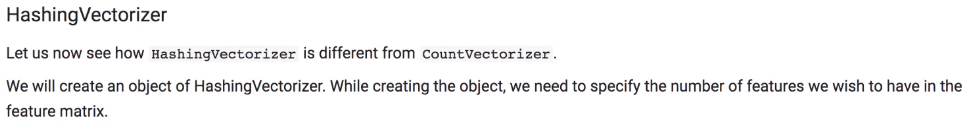

In [36]:
from sklearn.feature_extraction.text import HashingVectorizer

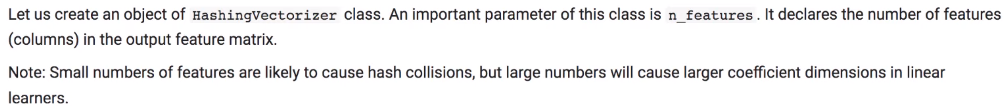

In [37]:
h_vectorizer = HashingVectorizer(n_features=50)

In [38]:
X_h = h_vectorizer.fit_transform(text_documents)

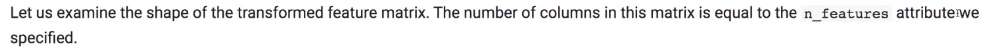

In [39]:
X_h.shape

(4, 50)

In [40]:
print(X_h[0])

  (0, 2)	-0.09284766908852593
  (0, 4)	-0.09284766908852593
  (0, 8)	-0.5570860145311556
  (0, 10)	-0.09284766908852593
  (0, 11)	-0.3713906763541037
  (0, 12)	0.09284766908852593
  (0, 13)	0.18569533817705186
  (0, 14)	0.09284766908852593
  (0, 15)	0.09284766908852593
  (0, 17)	-0.09284766908852593
  (0, 18)	0.09284766908852593
  (0, 19)	-0.09284766908852593
  (0, 20)	0.18569533817705186
  (0, 21)	0.18569533817705186
  (0, 23)	0.09284766908852593
  (0, 24)	0.09284766908852593
  (0, 30)	0.09284766908852593
  (0, 32)	0.09284766908852593
  (0, 34)	0.09284766908852593
  (0, 38)	0.2785430072655778
  (0, 39)	0.18569533817705186
  (0, 40)	-0.09284766908852593
  (0, 41)	0.18569533817705186
  (0, 43)	-0.09284766908852593
  (0, 44)	-0.09284766908852593
  (0, 45)	-0.3713906763541037
  (0, 46)	0.09284766908852593
  (0, 48)	-0.09284766908852593


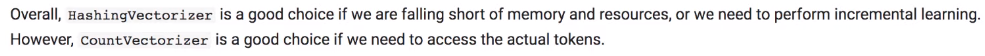
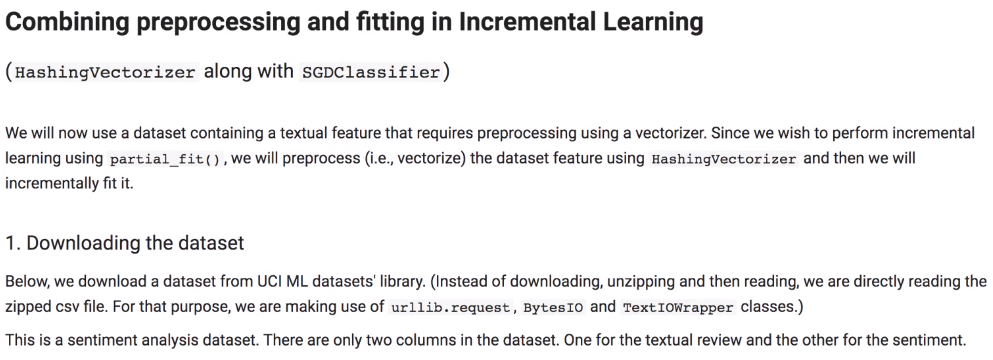

In [48]:
import urllib.request
from io import StringIO, BytesIO, TextIOWrapper
from zipfile import ZipFile

resp = urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip')
zipfile = ZipFile(BytesIO(resp.read()))

data = TextIOWrapper(zipfile.open('sentiment labelled sentences/amazon_cells_labelled.txt'), encoding='utf-8')

df = pd.read_csv(data, sep='\t')
df.columns = ['review', 'sentiment']

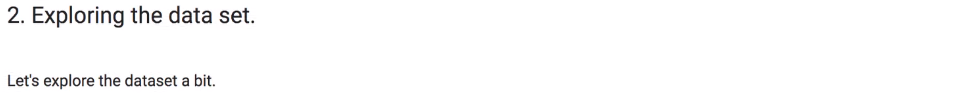

In [49]:
df.head()

review  sentiment
0                        Good case, Excellent value.          1
1                             Great for the jawbone.          1
2  Tied to charger for conversations lasting more...          0
3                                  The mic is great.          1
4  I have to jiggle the plug to get it to line up...          0

In [50]:
df.tail()

review  sentiment
994  The screen does get smudged easily because it ...          0
995  What a piece of junk.. I lose more calls on th...          0
996                       Item Does Not Match Picture.          0
997  The only thing that disappoint me is the infra...          0
998  You can not answer calls with the unit, never ...          0

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     999 non-null    object
 1   sentiment  999 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [52]:
df.describe()

sentiment
count  999.000000
mean     0.500501
std      0.500250
min      0.000000
25%      0.000000
50%      1.000000
75%      1.000000
max      1.000000

In [53]:
df.loc[:, 'sentiment'].unique()

array([1, 0], dtype=int64)

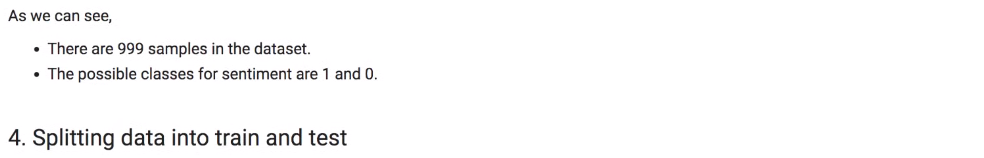

In [55]:
from sklearn.model_selection import train_test_split

X = df.loc[:, 'review']
y = df.loc[:, 'sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
X_train.shape, y_train.shape

((799,), (799,))

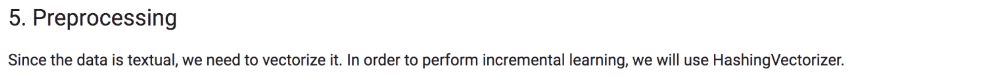

In [57]:
vectorizer = HashingVectorizer()

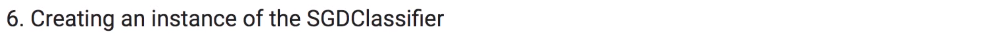

In [58]:
classifier = SGDClassifier(penalty='l2', loss='hinge')

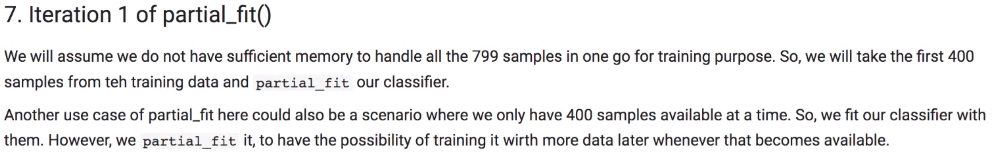

In [59]:
X_train_part1_hashed = vectorizer.fit_transform(X_train[0:400])
y_train_part1 = y_train[0:400]

In [60]:
all_classes = np.unique(df.loc[:, 'sentiment'])  # all classes are needed in the FIRST iteration of partial_fit()